In [1]:
## Read table, combine table, parse the time string, save to pkl
## Visualize the excursion event
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
from scipy import signal
from scipy.fftpack import fft, ifft
import time
from anomaly_detection import anomaly_detection
pd.set_option('display.max_columns', 51)
font = {'family' : 'Consolas',
        'weight' : 'bold',
        'size'   : 32}
plt.rc('font', **font)
import os 
dir_path = os.getcwd()
data_dir = os.path.abspath(os.path.join(dir_path, '../data'))
print (data_dir)
combined_pkl = os.path.join(data_dir, "combine.pkl")
combined_pkg_tbl = os.path.join(data_dir, 'combine_table.pkl')
part1_pkl = os.path.join(data_dir, "Part1.pkl")
part2_pkl = os.path.join(data_dir, "Part2.pkl")
%matplotlib inline

Using TensorFlow backend.


/home/aind2/workspace/unu_bhp_2018/data


In [2]:
file_df = pd.read_pickle(combined_pkl)

file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469681 entries, 0 to 469680
Data columns (total 89 columns):
hackathon4_x                                                               469681 non-null object
TimeStamp                                                                  469681 non-null datetime64[ns]
05-PT-28201-01_B2_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-28201-03_B2_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-29101-02_C1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-29101-03_C1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-33101-02_G1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-33101-03_G1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-34101-01_H1_Manifold_Pressure (Psi)                                  469681 non-null 

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.03374, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
10s - loss: 0.0096 - val_loss: 0.0337
Epoch 2/60
Epoch 00001: val_loss did not improve
6s - loss: 0.0041 - val_loss: 0.0408
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 0.0040 - val_loss: 0.0381
Epoch 4/60
Epoch 00003: val_loss improved from 0.03374 to 0.02970, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
6s - loss: 0.0043 - val_loss: 0.0297
Epoch 5/60
Epoch 00004: val_loss improved from 0.02970 to 0.02170, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
6s - loss: 0.0039 - val_loss: 0.0217
Epoch 6/60
Epoch 00005: val_loss improved from 0.02170 to 0.01657, saving model to /home/aind2/workspace/unu_bhp_2018/dat

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Consolas'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


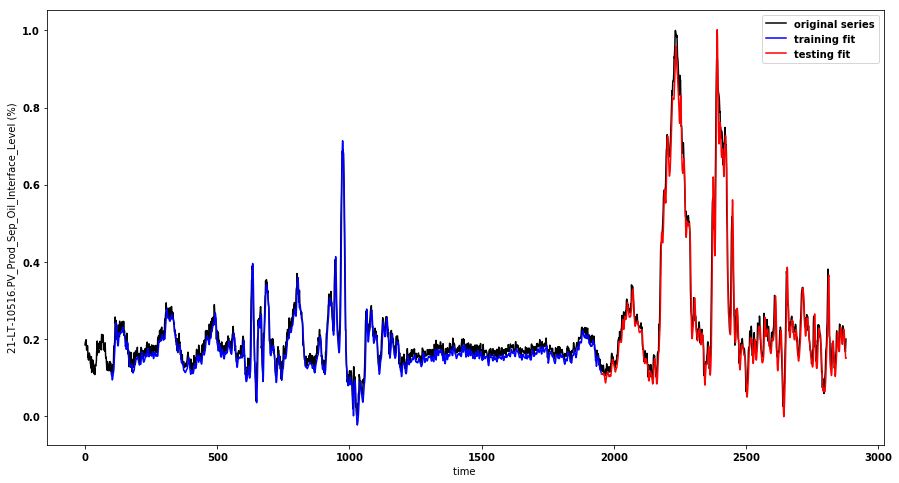

In [3]:
anomaly_detection = anomaly_detection(sequence_length=100, batch_size=128, epochs=60, dropout=0.6, verbose = 2)
start = time.time()
start_time = datetime(2016, 11, 15,10,0)
end_time = datetime(2016, 11, 16, 10,0)
time_range= (file_df["TimeStamp"] < end_time) & (file_df["TimeStamp"] > start_time)
column_name = "21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)"
time_series = file_df[time_range][column_name]
anomaly_detection.set_name(column_name)
anomaly_detection.timeseries_fit(time_series, show_figures=True, run_model = True)

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Consolas'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


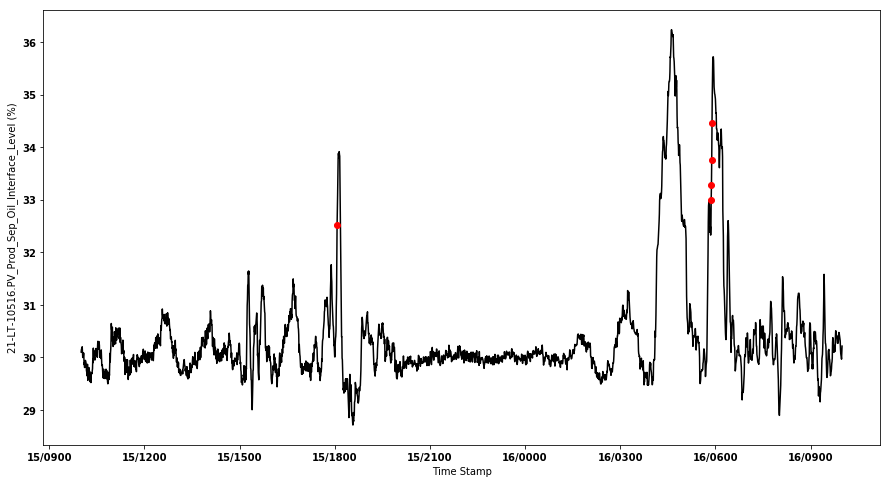

In [4]:
datefmt = mdates.DateFormatter('%d/%H%M')

anomalies = anomaly_detection.find_anomaly(error_level=0.15)
if anomalies.any():
    fig, ax = plt.subplots(figsize=(15,8))
    x = np.asarray(file_df[time_range]['TimeStamp'])
    y = np.asarray(time_series)
    ax.plot(x, y, color='k')
    for i in anomalies:
        ax.plot(x[i],y[i],'ro')
    ax.xaxis.set_major_formatter(datefmt)
    plt.xlabel('Time Stamp')
    plt.ylabel(column_name)

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.02970, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
7s - loss: 0.0868 - val_loss: 0.0297
Epoch 2/60
Epoch 00001: val_loss improved from 0.02970 to 0.01466, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
6s - loss: 0.0169 - val_loss: 0.0147
Epoch 3/60
Epoch 00002: val_loss improved from 0.01466 to 0.01259, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
6s - loss: 0.0134 - val_loss: 0.0126
Epoch 4/60
Epoch 00003: val_loss improved from 0.01259 to 0.01203, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
6s - loss: 0.0124 - val_loss: 0.0120
Epoch 5/60
Epoch 00004: val_loss improved from 0.01203 to 0.01028, saving

Epoch 00054: val_loss did not improve
6s - loss: 0.0040 - val_loss: 0.0015
Epoch 56/60
Epoch 00055: val_loss did not improve
6s - loss: 0.0039 - val_loss: 0.0020
Epoch 57/60
Epoch 00056: val_loss improved from 0.00141 to 0.00135, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
6s - loss: 0.0037 - val_loss: 0.0013
Epoch 58/60
Epoch 00057: val_loss did not improve
6s - loss: 0.0038 - val_loss: 0.0015
Epoch 59/60
Epoch 00058: val_loss did not improve
6s - loss: 0.0036 - val_loss: 0.0014
Epoch 60/60
Epoch 00059: val_loss improved from 0.00135 to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/21-LT-10516.PV_Prod_Sep_Oil_Interface_Level (%)_weights.hdf5
6s - loss: 0.0040 - val_loss: 0.0013


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Consolas'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


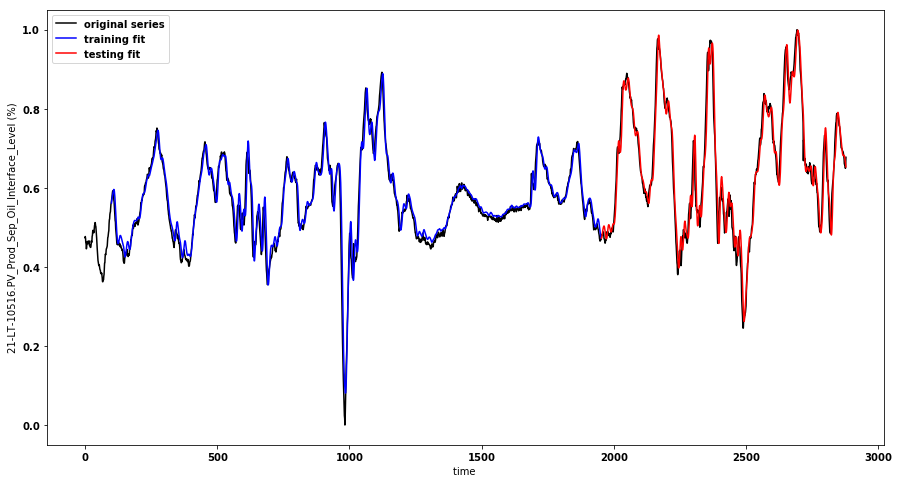

In [5]:
column_name = "05-PT-29101-02_C1_Manifold_Pressure (Psi)"
time_series = file_df[time_range][column_name]
anomaly_detection.timeseries_fit(time_series, show_figures=True, run_model = True)

anomaly_detection.set_name(column_name)

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Consolas'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


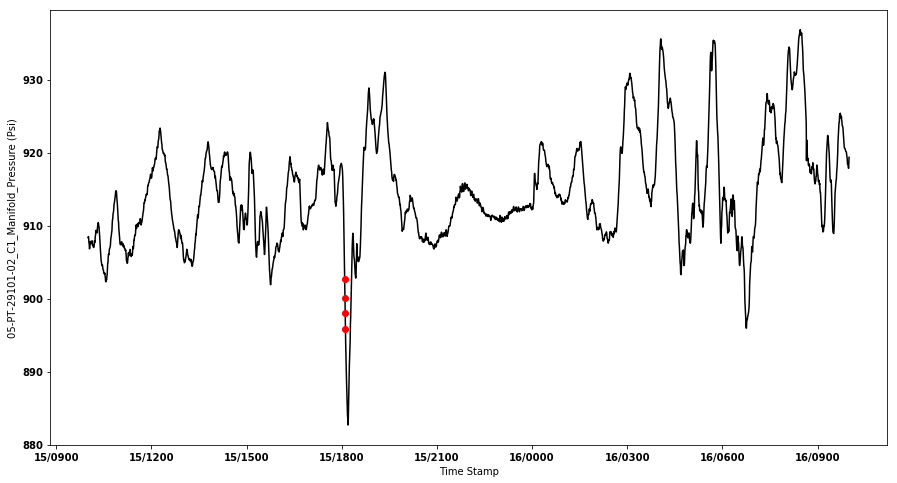

In [6]:
anomalies = anomaly_detection.find_anomaly(error_level=0.15)
if anomalies.any():
    fig, ax = plt.subplots(figsize=(15,8))
    x = np.asarray(file_df[time_range]['TimeStamp'])
    y = np.asarray(time_series)
    ax.plot(x, y, color='k')
    for i in anomalies:
        ax.plot(x[i],y[i],'ro')
    ax.xaxis.set_major_formatter(datefmt)
    plt.xlabel('Time Stamp')
    plt.ylabel(column_name)

Processing: 05-TT-29101-03_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.00025, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-03_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
7s - loss: 0.0158 - val_loss: 2.5092e-04
Epoch 2/60
Epoch 00001: val_loss did not improve
6s - loss: 0.0242 - val_loss: 0.0287
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 0.0142 - val_loss: 0.0128
Epoch 4/60
Epoch 00003: val_loss did not improve
6s - loss: 0.0225 - val_loss: 0.0015
Epoch 5/60
Epoch 00004: val_loss did not improve
6s - loss: 0.0289 - val_loss: 0.0105
Epoch 6/60
Epoch 00005: val_loss did not improve
6s - loss: 0.0279 - val_loss: 0.0074
Epoch 7/60
Epoch 00006: val_loss did not improve
6s - loss: 0.0221 - val_loss: 0.0015
Epoch 8/60
Epoch 00007: val_loss did not improve
6s - loss: 0.0216 - val_loss: 0.0097
Epoch 9/60
Epoch 00008: val_loss did not improve
6s - loss: 0.0134 - val_loss: 0.0083
Epoch 

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Consolas'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Found no anomalies in 05-TT-29101-03_C1_Manifold_Temperature (DegF) between 2016-11-15 10:00:00 and 2016-11-16 10:00:00
Processing: 05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.07973, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
8s - loss: 0.1079 - val_loss: 0.0797
Epoch 2/60
Epoch 00001: val_loss improved from 0.07973 to 0.03006, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0578 - val_loss: 0.0301
Epoch 3/60
Epoch 00002: val_loss improved from 0.03006 to 0.02377, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0391 - val_loss: 0.0238
Epoch 4/60
Epoch 00003: val_loss did not improve
6s - loss: 0.0207 - val_loss: 0.0238
Epoch 5/60
Epoch 00004: val_loss improved from 0.02377 to 0.02272, saving model to /home/aind2

Epoch 00050: val_loss did not improve
6s - loss: 0.0076 - val_loss: 0.0103
Epoch 52/60
Epoch 00051: val_loss did not improve
6s - loss: 0.0075 - val_loss: 0.0107
Epoch 53/60
Epoch 00052: val_loss improved from 0.01007 to 0.01002, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0076 - val_loss: 0.0100
Epoch 54/60
Epoch 00053: val_loss improved from 0.01002 to 0.00968, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-29101-02_C1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0073 - val_loss: 0.0097
Epoch 55/60
Epoch 00054: val_loss did not improve
6s - loss: 0.0073 - val_loss: 0.0101
Epoch 56/60
Epoch 00055: val_loss did not improve
6s - loss: 0.0073 - val_loss: 0.0110
Epoch 57/60
Epoch 00056: val_loss did not improve
6s - loss: 0.0084 - val_loss: 0.0128
Epoch 58/60
Epoch 00057: val_loss did not improve
6s - lo

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.01803, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-02_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
8s - loss: 0.0789 - val_loss: 0.0180
Epoch 2/60
Epoch 00001: val_loss improved from 0.01803 to 0.01468, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-02_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0162 - val_loss: 0.0147
Epoch 3/60
Epoch 00002: val_loss improved from 0.01468 to 0.01367, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-02_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0134 - val_loss: 0.0137
Epoch 4/60
Epoch 00003: val_loss improved from 0.01367 to 0.01112, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-02_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11

Epoch 00047: val_loss did not improve
6s - loss: 0.0045 - val_loss: 0.0015
Epoch 49/60
Epoch 00048: val_loss did not improve
6s - loss: 0.0043 - val_loss: 0.0019
Epoch 50/60
Epoch 00049: val_loss did not improve
6s - loss: 0.0040 - val_loss: 0.0016
Epoch 51/60
Epoch 00050: val_loss did not improve
6s - loss: 0.0044 - val_loss: 0.0015
Epoch 52/60
Epoch 00051: val_loss improved from 0.00145 to 0.00136, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-02_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0040 - val_loss: 0.0014
Epoch 53/60
Epoch 00052: val_loss did not improve
6s - loss: 0.0041 - val_loss: 0.0014
Epoch 54/60
Epoch 00053: val_loss did not improve
6s - loss: 0.0039 - val_loss: 0.0024
Epoch 55/60
Epoch 00054: val_loss did not improve
6s - loss: 0.0042 - val_loss: 0.0023
Epoch 56/60
Epoch 00055: val_loss did not improve
6s - loss: 0.0040 - val_loss: 0.0016
Epoch 57/60
Epoch 00056: val_loss did not improve
6s - loss:

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.00220, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-03_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
8s - loss: 0.1352 - val_loss: 0.0022
Epoch 2/60
Epoch 00001: val_loss did not improve
6s - loss: 0.0654 - val_loss: 0.0114
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 0.0199 - val_loss: 0.0078
Epoch 4/60
Epoch 00003: val_loss did not improve
6s - loss: 0.0135 - val_loss: 0.0024
Epoch 5/60
Epoch 00004: val_loss improved from 0.00220 to 0.00144, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-03_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0143 - val_loss: 0.0014
Epoch 6/60
Epoch 00005: val_loss improved from 0.00144 to 0.00135, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-29101-03_C1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.00145, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-04_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
8s - loss: 0.0011 - val_loss: 0.0014
Epoch 2/60
Epoch 00001: val_loss improved from 0.00145 to 0.00135, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-04_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 2.2853e-04 - val_loss: 0.0013
Epoch 3/60
Epoch 00002: val_loss improved from 0.00135 to 0.00134, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-04_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 1.9818e-04 - val_loss: 0.0013
Epoch 4/60
Epoch 00003: val_loss improved from 0.00134 to 0.00132, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-04_H1_Manifold_Temperature (DegF)_201

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-01_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
9s - loss: 3.5041e-05 - val_loss: 0.0013
Epoch 2/60
Epoch 00001: val_loss improved from 0.00130 to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-34101-01_H1_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 3.9242e-06 - val_loss: 0.0013
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 1.0537e-06 - val_loss: 0.0013
Epoch 4/60
Epoch 00003: val_loss did not improve
6s - loss: 1.5503e-06 - val_loss: 0.0013
Epoch 5/60
Epoch 00004: val_loss did not improve
6s - loss: 1.0462e-06 - val_loss: 0.0013
Epoch 6/60
Epoch 00005: val_loss did not improve
6s - loss: 9.1078e-07 - val_loss: 0.0013
Epoch 7/60
Epoch 00006: val_loss did not improve
6s - loss: 8.0662e-07 

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-34101-04_H1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
9s - loss: 3.1450e-05 - val_loss: 0.0013
Epoch 2/60
Epoch 00001: val_loss improved from 0.00130 to 0.00129, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-34101-04_H1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 3.8693e-06 - val_loss: 0.0013
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 1.1827e-06 - val_loss: 0.0013
Epoch 4/60
Epoch 00003: val_loss did not improve
6s - loss: 6.9294e-07 - val_loss: 0.0013
Epoch 5/60
Epoch 00004: val_loss did not improve
6s - loss: 5.9311e-07 - val_loss: 0.0013
Epoch 6/60
Epoch 00005: val_loss did not improve
6s - loss: 5.0095e-07 - val_loss: 0.0013
Epoch 7/60
Epoch 00006: val_loss did not improve
6s - loss: 4.5592e-07 - val_lo

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.00133, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-34101-01_H1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
9s - loss: 5.4753e-05 - val_loss: 0.0013
Epoch 2/60
Epoch 00001: val_loss improved from 0.00133 to 0.00131, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-34101-01_H1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 5.2587e-06 - val_loss: 0.0013
Epoch 3/60
Epoch 00002: val_loss improved from 0.00131 to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-34101-01_H1_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 1.2042e-06 - val_loss: 0.0013
Epoch 4/60
Epoch 00003: val_loss improved from 0.00130 to 0.00130, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-34101-01_H1_Manifold_Pressure (Psi)_2016-11-15 10:0

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Found 2 anomalies in 05-PT-34101-01_H1_Manifold_Pressure (Psi) between 2016-11-15 10:00:00 and 2016-11-16 10:00:00
Processing: 05-TT-28201-01_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.01769, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-01_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
11s - loss: 0.0599 - val_loss: 0.0177
Epoch 2/60
Epoch 00001: val_loss did not improve
7s - loss: 0.0268 - val_loss: 0.0199
Epoch 3/60
Epoch 00002: val_loss did not improve
7s - loss: 0.0288 - val_loss: 0.0250
Epoch 4/60
Epoch 00003: val_loss did not improve
7s - loss: 0.0286 - val_loss: 0.0220
Epoch 5/60
Epoch 00004: val_loss did not improve
7s - loss: 0.0309 - val_loss: 0.0187
Epoch 6/60
Epoch 00005: val_loss improved from 0.01769 to 0.01767, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-01_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
7s - loss: 0.0328 - val_loss: 0.0177
Epoch 7/60
Epoch 00006: val_loss did not improve
7s - loss: 0.0313 - val_loss: 0.0199
Epoch 8/

Epoch 00054: val_loss improved from 0.01681 to 0.01678, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-01_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0192 - val_loss: 0.0168
Epoch 56/60
Epoch 00055: val_loss improved from 0.01678 to 0.01675, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-01_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0189 - val_loss: 0.0168
Epoch 57/60
Epoch 00056: val_loss improved from 0.01675 to 0.01674, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-01_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0193 - val_loss: 0.0167
Epoch 58/60
Epoch 00057: val_loss did not improve
6s - loss: 0.0188 - val_loss: 0.0168
Epoch 59/60
Epoch 00058: val_loss did not improve
6s - loss: 0.0201 - val_loss: 0.0168
Epoch 60/60
Epoch 00059: val_loss improved from 0.01674 to

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.01012, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-03_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
10s - loss: 0.0632 - val_loss: 0.0101
Epoch 2/60
Epoch 00001: val_loss improved from 0.01012 to 0.00957, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-03_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0182 - val_loss: 0.0096
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 0.0266 - val_loss: 0.0140
Epoch 4/60
Epoch 00003: val_loss did not improve
6s - loss: 0.0277 - val_loss: 0.0250
Epoch 5/60
Epoch 00004: val_loss did not improve
6s - loss: 0.0197 - val_loss: 0.0187
Epoch 6/60
Epoch 00005: val_loss did not improve
6s - loss: 0.0183 - val_loss: 0.0167
Epoch 7/60
Epoch 00006: val_loss did not improve
6s - loss: 0.0185 - val_loss: 0.0143
Epoch 8/

Epoch 00042: val_loss did not improve
6s - loss: 0.0081 - val_loss: 0.0044
Epoch 44/60
Epoch 00043: val_loss improved from 0.00436 to 0.00432, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-03_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0081 - val_loss: 0.0043
Epoch 45/60
Epoch 00044: val_loss did not improve
6s - loss: 0.0071 - val_loss: 0.0045
Epoch 46/60
Epoch 00045: val_loss did not improve
6s - loss: 0.0071 - val_loss: 0.0047
Epoch 47/60
Epoch 00046: val_loss did not improve
6s - loss: 0.0063 - val_loss: 0.0045
Epoch 48/60
Epoch 00047: val_loss improved from 0.00432 to 0.00423, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-03_B2_Manifold_Temperature (DegF)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0063 - val_loss: 0.0042
Epoch 49/60
Epoch 00048: val_loss improved from 0.00423 to 0.00412, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-TT-28201-03_B2_Ma

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.02218, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
10s - loss: 0.0706 - val_loss: 0.0222
Epoch 2/60
Epoch 00001: val_loss did not improve
6s - loss: 0.0210 - val_loss: 0.0266
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 0.0181 - val_loss: 0.0319
Epoch 4/60
Epoch 00003: val_loss did not improve
6s - loss: 0.0152 - val_loss: 0.0260
Epoch 5/60
Epoch 00004: val_loss improved from 0.02218 to 0.01808, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0122 - val_loss: 0.0181
Epoch 6/60
Epoch 00005: val_loss improved from 0.01808 to 0.01543, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_201

Epoch 00051: val_loss did not improve
6s - loss: 0.0037 - val_loss: 0.0035
Epoch 53/60
Epoch 00052: val_loss improved from 0.00314 to 0.00300, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0038 - val_loss: 0.0030
Epoch 54/60
Epoch 00053: val_loss improved from 0.00300 to 0.00295, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0037 - val_loss: 0.0030
Epoch 55/60
Epoch 00054: val_loss improved from 0.00295 to 0.00260, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0035 - val_loss: 0.0026
Epoch 56/60
Epoch 00055: val_loss did not improve
6s - loss: 0.0034 - val_loss: 0.0032
Epoch 57/60
Epoch 00056: val_loss did not improve
6s - loss: 0.0035 - 

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.03207, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
11s - loss: 0.0793 - val_loss: 0.0321
Epoch 2/60
Epoch 00001: val_loss improved from 0.03207 to 0.03122, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0201 - val_loss: 0.0312
Epoch 3/60
Epoch 00002: val_loss improved from 0.03122 to 0.02757, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0173 - val_loss: 0.0276
Epoch 4/60
Epoch 00003: val_loss improved from 0.02757 to 0.02039, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-1

Epoch 00053: val_loss did not improve
6s - loss: 0.0040 - val_loss: 0.0032
Epoch 55/60
Epoch 00054: val_loss did not improve
6s - loss: 0.0042 - val_loss: 0.0039
Epoch 56/60
Epoch 00055: val_loss did not improve
6s - loss: 0.0040 - val_loss: 0.0045
Epoch 57/60
Epoch 00056: val_loss did not improve
6s - loss: 0.0035 - val_loss: 0.0032
Epoch 58/60
Epoch 00057: val_loss did not improve
6s - loss: 0.0036 - val_loss: 0.0037
Epoch 59/60
Epoch 00058: val_loss did not improve
6s - loss: 0.0030 - val_loss: 0.0030
Epoch 60/60
Epoch 00059: val_loss did not improve
6s - loss: 0.0031 - val_loss: 0.0027
Found 2 anomalies in 05-PT-28201-03_B2_Manifold_Pressure (Psi) between 2016-11-15 10:00:00 and 2016-11-16 10:00:00
Processing: 05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.01827, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
11s - loss: 0.0629 - val_loss: 0.0183
Epoch 2/60
Epoch 00001: val_loss did not improve
6s - loss: 0.0191 - val_loss: 0.0206
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 0.0171 - val_loss: 0.0259
Epoch 4/60
Epoch 00003: val_loss did not improve
6s - loss: 0.0143 - val_loss: 0.0242
Epoch 5/60
Epoch 00004: val_loss improved from 0.01827 to 0.01789, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0123 - val_loss: 0.0179
Epoch 6/60
Epoch 00005: val_loss improved from 0.01789 to 0.01566, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_201

Epoch 00048: val_loss did not improve
6s - loss: 0.0038 - val_loss: 0.0028
Epoch 50/60
Epoch 00049: val_loss did not improve
6s - loss: 0.0037 - val_loss: 0.0035
Epoch 51/60
Epoch 00050: val_loss did not improve
6s - loss: 0.0038 - val_loss: 0.0029
Epoch 52/60
Epoch 00051: val_loss improved from 0.00270 to 0.00266, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0040 - val_loss: 0.0027
Epoch 53/60
Epoch 00052: val_loss did not improve
6s - loss: 0.0036 - val_loss: 0.0028
Epoch 54/60
Epoch 00053: val_loss did not improve
6s - loss: 0.0042 - val_loss: 0.0036
Epoch 55/60
Epoch 00054: val_loss did not improve
6s - loss: 0.0041 - val_loss: 0.0031
Epoch 56/60
Epoch 00055: val_loss did not improve
6s - loss: 0.0036 - val_loss: 0.0032
Epoch 57/60
Epoch 00056: val_loss improved from 0.00266 to 0.00263, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manif

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.03555, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
11s - loss: 0.0850 - val_loss: 0.0356
Epoch 2/60
Epoch 00001: val_loss improved from 0.03555 to 0.03131, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0200 - val_loss: 0.0313
Epoch 3/60
Epoch 00002: val_loss improved from 0.03131 to 0.02793, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0169 - val_loss: 0.0279
Epoch 4/60
Epoch 00003: val_loss improved from 0.02793 to 0.01861, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-1

Epoch 00057: val_loss did not improve
6s - loss: 0.0034 - val_loss: 0.0032
Epoch 59/60
Epoch 00058: val_loss improved from 0.00272 to 0.00261, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0032 - val_loss: 0.0026
Epoch 60/60
Epoch 00059: val_loss did not improve
6s - loss: 0.0030 - val_loss: 0.0035
Found 7 anomalies in 05-PT-28201-03_B2_Manifold_Pressure (Psi) between 2016-11-15 10:00:00 and 2016-11-16 10:00:00
Processing: 05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00


/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.02350, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
11s - loss: 0.0665 - val_loss: 0.0235
Epoch 2/60
Epoch 00001: val_loss did not improve
6s - loss: 0.0226 - val_loss: 0.0302
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 0.0188 - val_loss: 0.0340
Epoch 4/60
Epoch 00003: val_loss did not improve
6s - loss: 0.0158 - val_loss: 0.0252
Epoch 5/60
Epoch 00004: val_loss improved from 0.02350 to 0.02226, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0140 - val_loss: 0.0223
Epoch 6/60
Epoch 00005: val_loss improved from 0.02226 to 0.01787, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_201

Epoch 00049: val_loss did not improve
6s - loss: 0.0041 - val_loss: 0.0030
Epoch 51/60
Epoch 00050: val_loss did not improve
6s - loss: 0.0041 - val_loss: 0.0031
Epoch 52/60
Epoch 00051: val_loss did not improve
6s - loss: 0.0040 - val_loss: 0.0034
Epoch 53/60
Epoch 00052: val_loss did not improve
6s - loss: 0.0041 - val_loss: 0.0033
Epoch 54/60
Epoch 00053: val_loss did not improve
6s - loss: 0.0036 - val_loss: 0.0030
Epoch 55/60
Epoch 00054: val_loss did not improve
6s - loss: 0.0035 - val_loss: 0.0029
Epoch 56/60
Epoch 00055: val_loss did not improve
6s - loss: 0.0037 - val_loss: 0.0029
Epoch 57/60
Epoch 00056: val_loss improved from 0.00272 to 0.00234, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-01_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0037 - val_loss: 0.0023
Epoch 58/60
Epoch 00057: val_loss did not improve
6s - loss: 0.0036 - val_loss: 0.0027
Epoch 59/60
Epoch 00058: val_loss did not improve
6s - loss:

/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/aind2/anaconda3/envs/aind2/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Train on 1853 samples, validate on 926 samples
Epoch 1/60
Epoch 00000: val_loss improved from inf to 0.02954, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
12s - loss: 0.0765 - val_loss: 0.0295
Epoch 2/60
Epoch 00001: val_loss improved from 0.02954 to 0.02059, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0194 - val_loss: 0.0206
Epoch 3/60
Epoch 00002: val_loss did not improve
6s - loss: 0.0166 - val_loss: 0.0261
Epoch 4/60
Epoch 00003: val_loss did not improve
6s - loss: 0.0142 - val_loss: 0.0213
Epoch 5/60
Epoch 00004: val_loss improved from 0.02059 to 0.01736, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0134 - val_loss: 0.0174
Epoch 6/60
Epoch 00

Epoch 00053: val_loss improved from 0.00275 to 0.00260, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0035 - val_loss: 0.0026
Epoch 55/60
Epoch 00054: val_loss did not improve
6s - loss: 0.0033 - val_loss: 0.0029
Epoch 56/60
Epoch 00055: val_loss improved from 0.00260 to 0.00237, saving model to /home/aind2/workspace/unu_bhp_2018/data/05-PT-28201-03_B2_Manifold_Pressure (Psi)_2016-11-15 10:00:00_2016-11-16 10:00:00_weights.hdf5
6s - loss: 0.0035 - val_loss: 0.0024
Epoch 57/60
Epoch 00056: val_loss did not improve
6s - loss: 0.0036 - val_loss: 0.0028
Epoch 58/60
Epoch 00057: val_loss did not improve
6s - loss: 0.0040 - val_loss: 0.0032
Epoch 59/60
Epoch 00058: val_loss did not improve
6s - loss: 0.0037 - val_loss: 0.0030
Epoch 60/60
Epoch 00059: val_loss did not improve
6s - loss: 0.0039 - val_loss: 0.0032
Found 3 anomalies in 05-PT-28201-03_B2_Manifold_Pressure (Psi) be

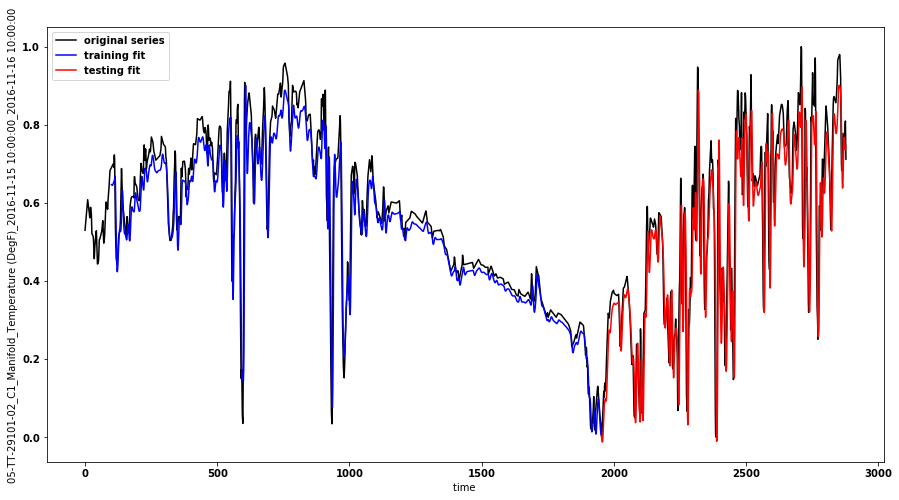

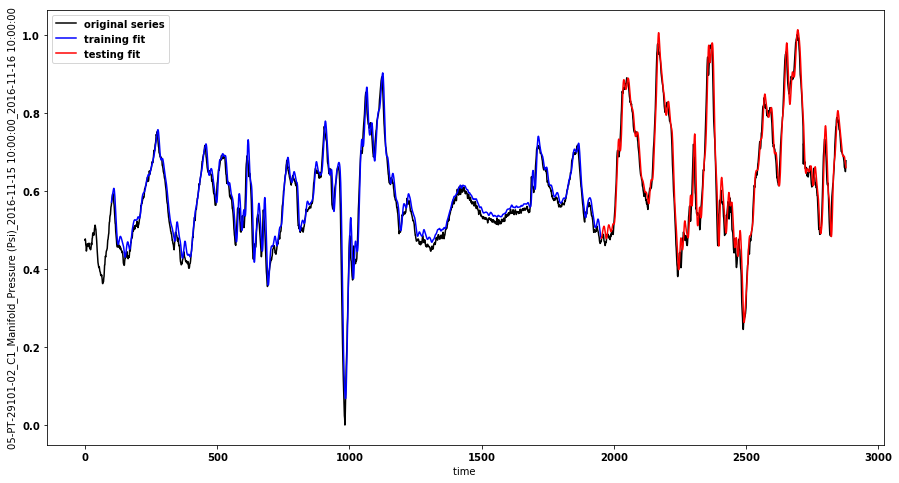

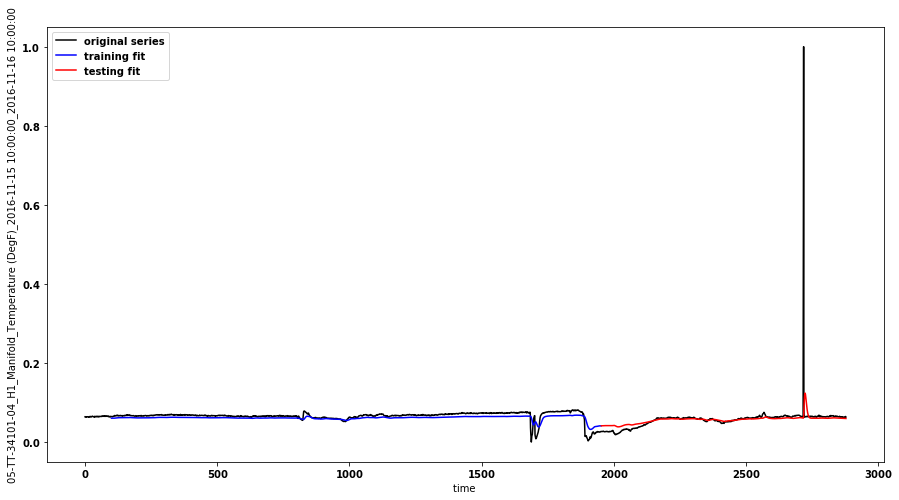

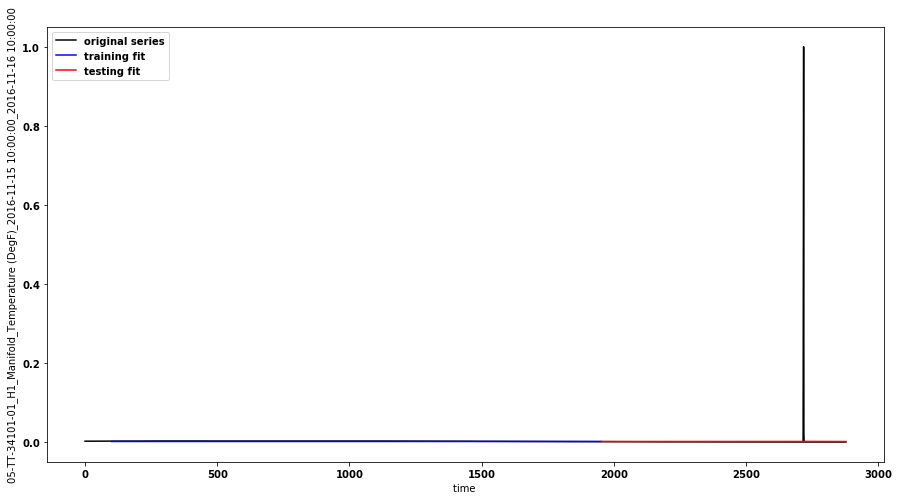

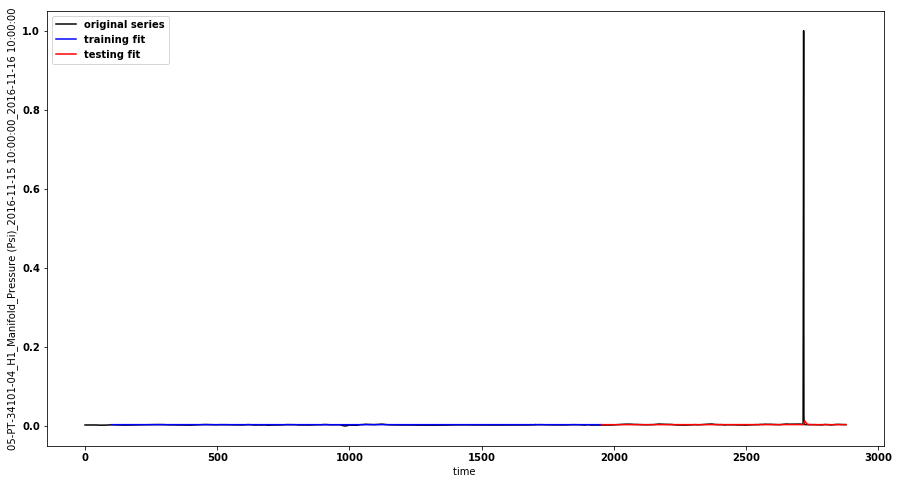

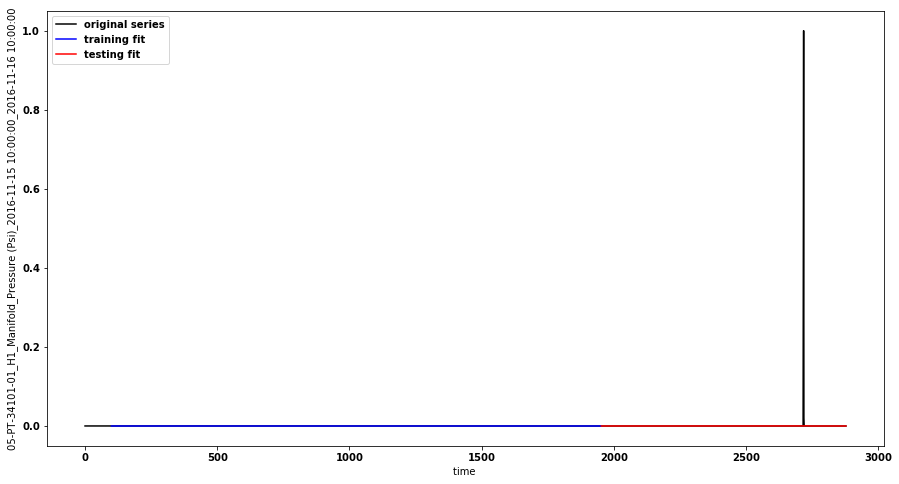

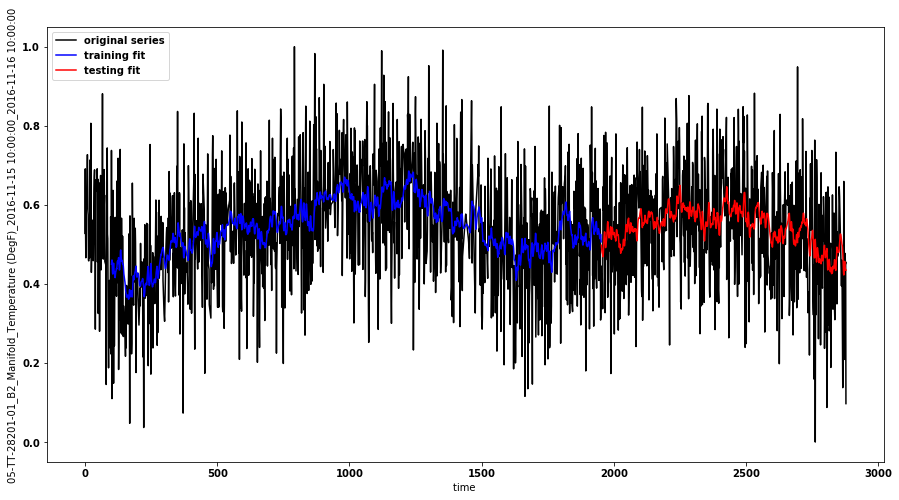

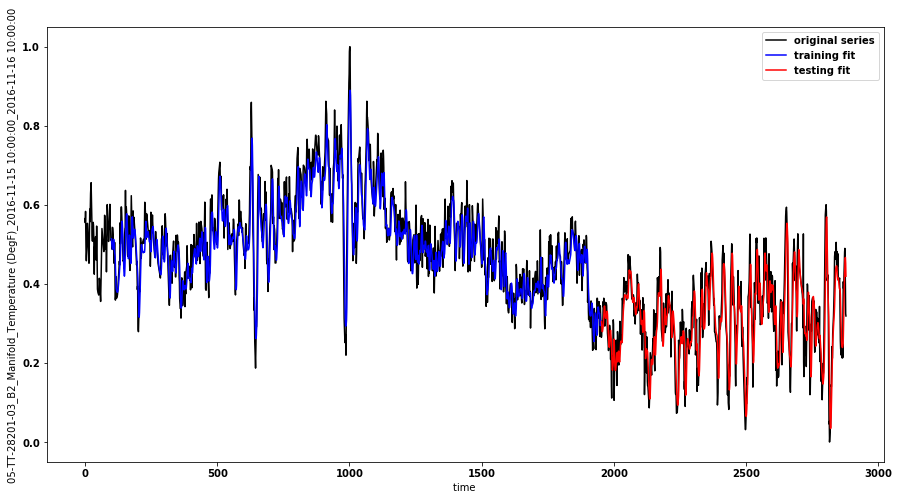

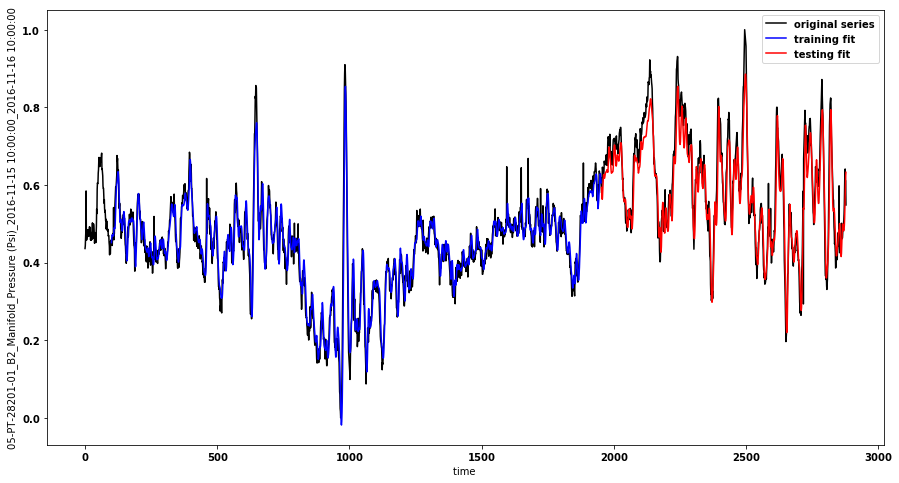

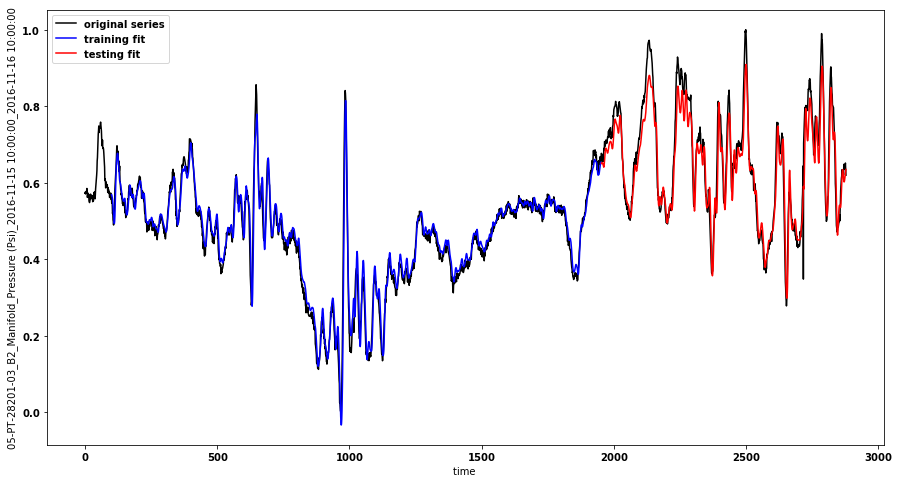

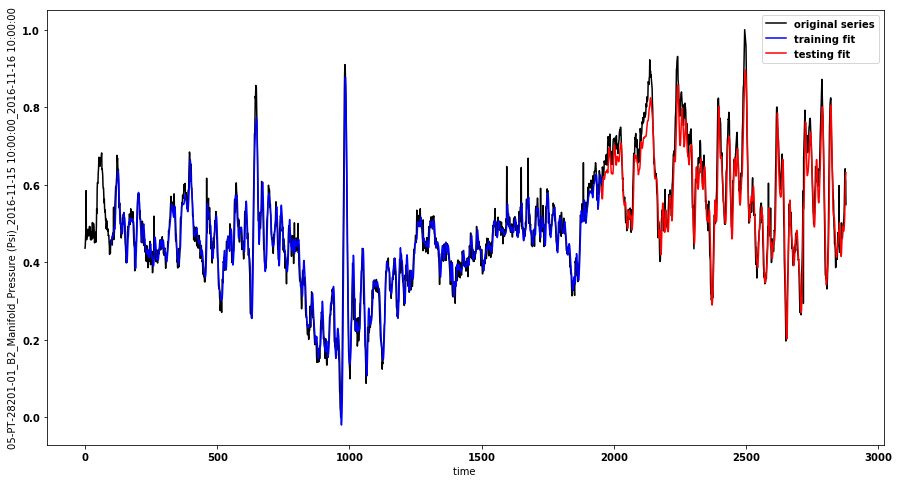

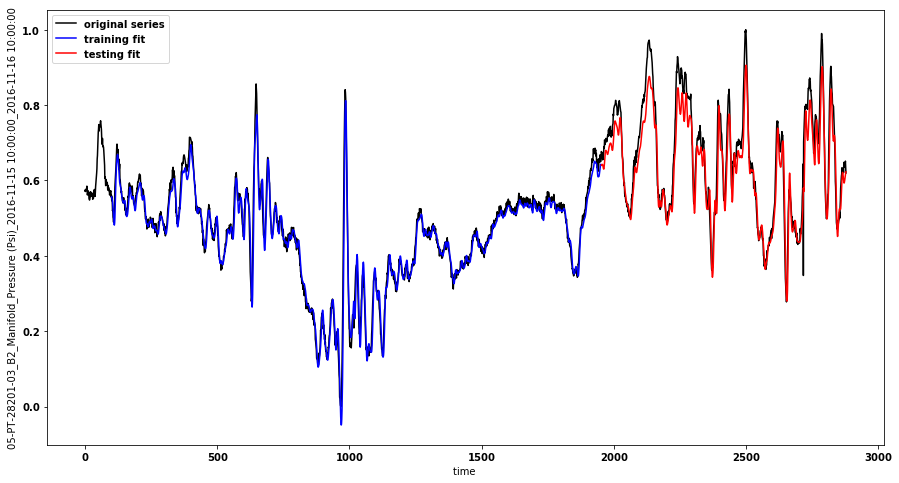

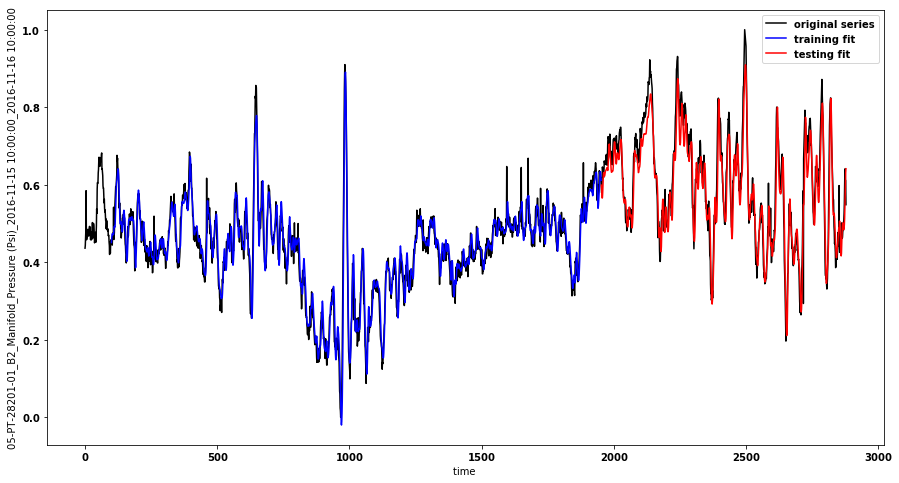

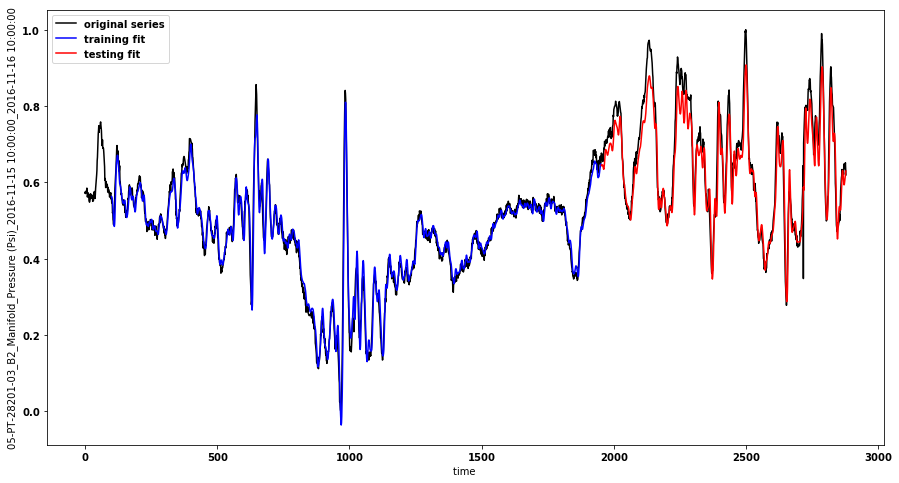

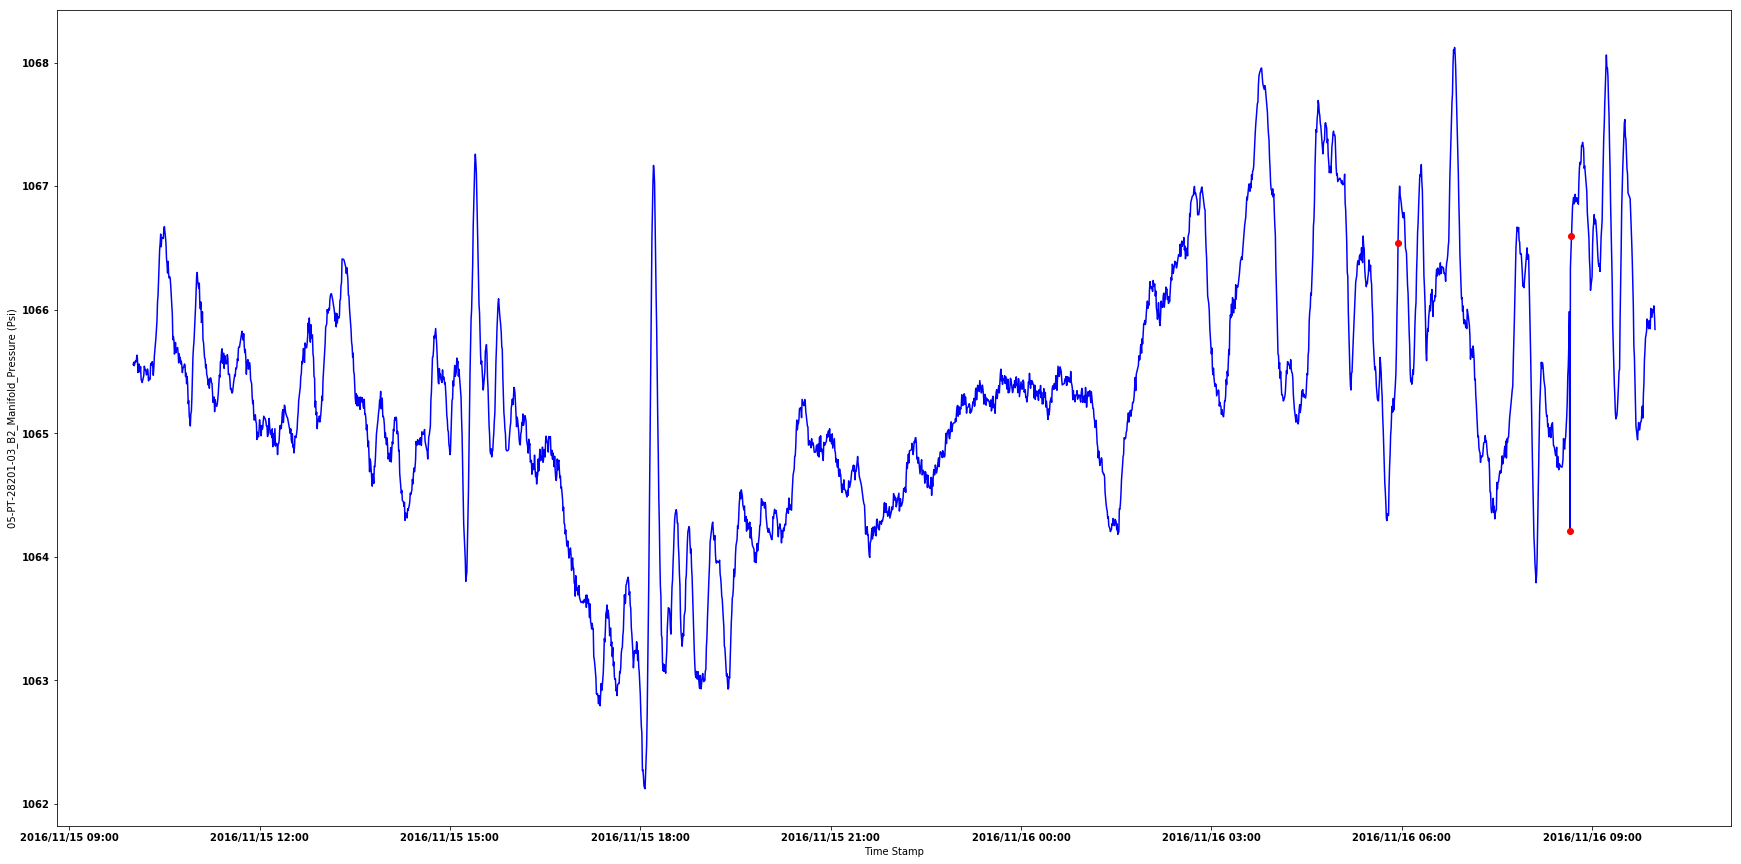

In [7]:
datefmt = mdates.DateFormatter('%Y/%m/%d %H:%M')
column_names = ["05-TT-29101-03_C1_Manifold_Temperature (DegF)",
"05-TT-29101-02_C1_Manifold_Temperature (DegF)", 
"05-PT-29101-02_C1_Manifold_Pressure (Psi)",
"05-PT-29101-03_C1_Manifold_Pressure (Psi)",
"05-TT-34101-04_H1_Manifold_Temperature (DegF)",
"05-TT-34101-01_H1_Manifold_Temperature (DegF)",
"05-PT-34101-04_H1_Manifold_Pressure (Psi)",
"05-PT-34101-01_H1_Manifold_Pressure (Psi)",
"05-TT-28201-01_B2_Manifold_Temperature (DegF)",
"05-TT-28201-03_B2_Manifold_Temperature (DegF)",
"05-PT-28201-01_B2_Manifold_Pressure (Psi)",
"05-PT-28201-03_B2_Manifold_Pressure (Psi)",
"05-PT-28201-01_B2_Manifold_Pressure (Psi)",
"05-PT-28201-03_B2_Manifold_Pressure (Psi)",
"05-PT-28201-01_B2_Manifold_Pressure (Psi)",
"05-PT-28201-03_B2_Manifold_Pressure (Psi)"]

for column_name in column_names:
    time_series = file_df[time_range][column_name]
    name = f"{column_name}_{start_time}_{end_time}"
    print(f"Processing: {name}")
    anomaly_detection.set_name(name)
    anomaly_detection.timeseries_fit(time_series, show_figures=True, run_model = True)
    anomalies = anomaly_detection.find_anomaly(error_level=0.15)
    if anomalies.any():
        print(f"Found {len(anomalies)} anomalies in {column_name} between {start_time} and {end_time}")
        fig, ax = plt.subplots(figsize=(30,15))
        x = np.asarray(file_df[time_range]['TimeStamp'])
        y = np.asarray(time_series)
        ax.plot(x, y, color='b')
        for i in anomalies:
            ax.plot(x[i],y[i],'ro')
        ax.xaxis.set_major_formatter(datefmt)
        plt.xlabel('Time Stamp')
        plt.ylabel(column_name)
        figure_name = os.path.join(data_dir, name + "_anomalies.png")
            
        plt.savefig(figure_name)
    else:
        print(f"Found no anomalies in {column_name} between {start_time} and {end_time}")

In [ ]:

start_times=[datetime(2016, 10, 25, 10, 0), datetime(2016, 11, 15,10,0), datetime(2016, 11, 10,10,0), datetime(2016, 11, 26,10,0),
             datetime(2017, 1, 27,10,0), datetime(2017, 2, 18,10,0), datetime(2017, 3, 11,10,0)]

end_times = [datetime(2016, 10, 26, 10, 0), datetime(2016, 11, 16, 10,0),datetime(2016, 11, 11, 10,0),datetime(2016, 11, 27, 10,0), 
             datetime(2017, 1, 28, 10,0),datetime(2017, 2, 19, 10,0),datetime(2017, 3, 12, 10,0)]

for start_time, end_time in zip(start_times, end_times):
    time_range= (file_df["TimeStamp"] < end_time) & (file_df["TimeStamp"] > start_time)
    
    for column_name in column_names:
        time_series = file_df[time_range][column_name]
        name = f"{column_name}_{start_time}_{end_time}"
        print(f"Processing: {name}")
        anomaly_detection.set_name(name)
        anomaly_detection.timeseries_fit(time_series, show_figures=True, run_model = True)
        anomalies = anomaly_detection.find_anomaly(error_level=0.15)
        if anomalies.any():
            print(f"Found {len(anomalies)} anomalies in {column_name} between {start_time} and {end_time}")
            fig, ax = plt.subplots(figsize=(30,15))
            x = np.asarray(file_df[time_range]['TimeStamp'])
            y = np.asarray(time_series)
            ax.plot(x, y, color='b')
            for i in anomalies:
                ax.plot(x[i],y[i],'ro')
            ax.xaxis.set_major_formatter(datefmt)
            plt.xlabel('Time Stamp')
            plt.ylabel(column_name)
            figure_name = os.path.join(data_dir, name + "_anomalies.png")

            plt.savefig(figure_name)
        else:
            print(f"Found no anomalies in {column_name} between {start_time} and {end_time}")
